<a href="https://colab.research.google.com/github/JasonMullen/Data-Science-Projects/blob/main/Sentiment_Analysis_Stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Expoloratory analysis
[Stacked LSTM](https://www.kaggle.com/code/mertyldrr/stacked-lstm-tensorflow-2-beginner)

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
twitter_data = pd.read_csv('/content/Tweets.csv')
twitter_data.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
#describing the data set
twitter_data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [ ]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
twitter_data.isnull().sum().values

array([    0,     0,     0,  5462,  4118,     0, 14600,     0, 14608,
           0,     0, 13621,     0,  4733,  4820])

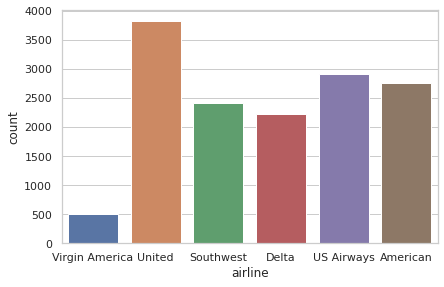

In [ ]:
sns.countplot(x=twitter_data['airline'])
plt.show()

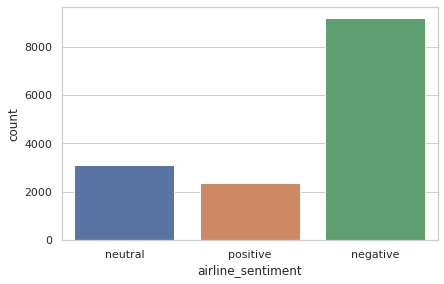

In [ ]:
sns.countplot(x=twitter_data['airline_sentiment'])
plt.show()

In [ ]:
import plotly.express as px
fig = px.pie(twitter_data, names = 'airline_sentiment', title = 'Pie chart for twitter sentiment')
fig.show()

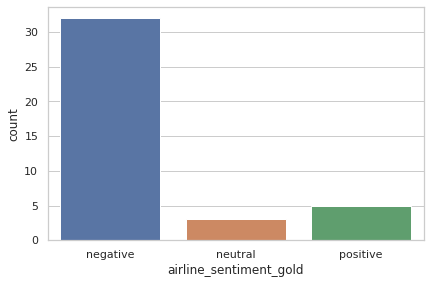

In [ ]:
sns.countplot(x=twitter_data['airline_sentiment_gold'])
plt.show()

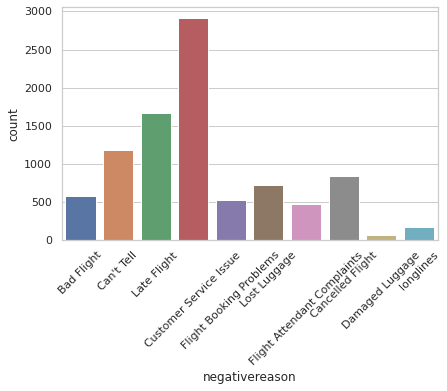

In [ ]:
sns.countplot(x=twitter_data['negativereason'])
plt.xticks(rotation = 45)
plt.show()

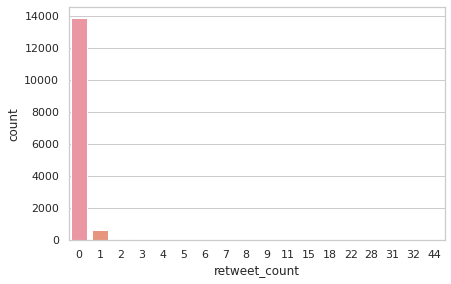

In [ ]:
sns.countplot(x=twitter_data['retweet_count'])
plt.show()

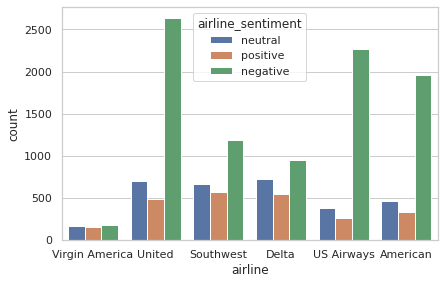

In [ ]:
sns.countplot(x = twitter_data['airline'], hue='airline_sentiment', data = twitter_data)
plt.show()

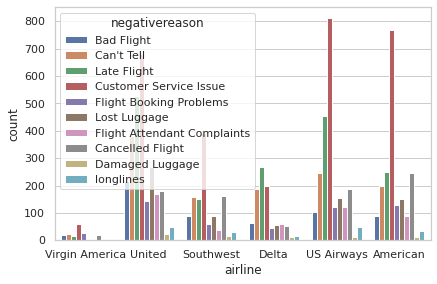

In [ ]:
sns.countplot(x = twitter_data['airline'], hue='negativereason', data = twitter_data)
plt.show()

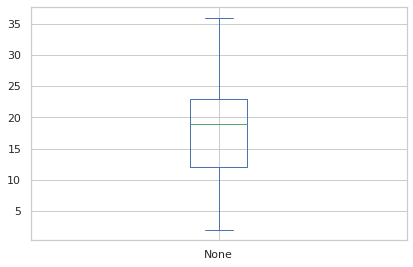

In [ ]:
#Tweet length
tweet_len = pd.Series([len(tweet.split()) for tweet in twitter_data['text']])

#The distribution of tweet text lengths
tweet_len.plot(kind = 'box')

# Data Cleaning

In [ ]:
pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --user -U nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#nltk
import nltk
#NLTK is a platform used for building python programs that work with human language
#data for applying statistical natuaral language processing(NLP)


#preprocessing
from nltk.corpus import stopwords  #stopwords
#It is used to remove stopwords such as "the", "a", "an", etc.

from nltk import word_tokenize,sent_tokenize # tokenizing
#Splitting up a larger body of text into smaller lines, words or even creating words for a non-English language.

from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
#PorterStemmer Is for reducing inflection in words to their root forms
#Ex: "Playing, plays, played" to their root word "play".

from nltk.stem.snowball import SnowballStemmer
#Snowball is the best Stemmer

from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet
#WordNetlemmatizer is the process of grouping the inflected forms of a word in
#order to analyze them as a single word in linguistics


# for part-of-speech tagging
from nltk import pos_tag
#Pos_tag is the process to mark up the words in text format for a
#particular part of a speech based on its definition and context.
#It's used to assign grammatical information of each word of the sentence.


# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
#TfidVectorizer: Uses an in-memory vocabulart(a python dict) to map the most frequent
#words to feature indicies and hence compute a word occurence frequency (sparse) matrix.
#CountVectorizer: It is used to transform a given text into a vector on the basis of frequency(count)
#of each word that occurs in the entire text.




# BeautifulSoup libraray
from bs4 import BeautifulSoup

import re # regex


#model_selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV




#evaluation
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix





#preprocessing scikit
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')




#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB


#stop-words
import nltk
nltk.download('stopwords')
stop_words=set(nltk.corpus.stopwords.words('english'))




#keras
import keras
from keras.preprocessing.text import one_hot,Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense , Flatten ,Embedding,Input,CuDNNLSTM,LSTM
from keras.models import Model
from keras.preprocessing.text import text_to_word_sequence

#gensim w2v
#word2vec
from gensim.models import Word2Vec

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
twitter_data.head(20)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [ ]:
df = twitter_data[['airline','text','airline_sentiment','airline_sentiment_confidence','negativereason_confidence']]

df.head(50)

,airline,text,airline_sentiment,airline_sentiment_confidence,negativereason_confidence
0,Virgin America,@VirginAmerica What @dhepburn said.,neutral,1.0000,NaN
1,Virgin America,@VirginAmerica plus you've added commercials t...,positive,0.3486,0.0000
2,Virgin America,@VirginAmerica I didn't today... Must mean I n...,neutral,0.6837,NaN
3,Virgin America,@VirginAmerica it's really aggressive to blast...,negative,1.0000,0.7033
4,Virgin America,@VirginAmerica and it's a really big bad thing...,negative,1.0000,1.0000
5,Virgin America,@VirginAmerica seriously would pay $30 a fligh...,negative,1.0000,0.6842
6,Virgin America,"@VirginAmerica yes, nearly every time I fly VX...",positive,0.6745,0.0000
7,Virgin America,@VirginAmerica Really missed a prime opportuni...,neutral,0.6340,NaN
8,Virgin America,"@virginamerica Well, I didn't…but NOW I DO! :-D",positive,0.6559,NaN
9,Virgin America,"@VirginAmerica it was amazing, and arrived an ...",positive,1.0000,NaN


In [ ]:
df['negativereason_confidence'] = df['negativereason_confidence'].fillna(0)
df.head(20)

,airline,text,airline_sentiment,airline_sentiment_confidence,negativereason_confidence
0,Virgin America,@VirginAmerica What @dhepburn said.,neutral,1.0000,0.0000
1,Virgin America,@VirginAmerica plus you've added commercials t...,positive,0.3486,0.0000
2,Virgin America,@VirginAmerica I didn't today... Must mean I n...,neutral,0.6837,0.0000
3,Virgin America,@VirginAmerica it's really aggressive to blast...,negative,1.0000,0.7033
4,Virgin America,@VirginAmerica and it's a really big bad thing...,negative,1.0000,1.0000
5,Virgin America,@VirginAmerica seriously would pay $30 a fligh...,negative,1.0000,0.6842
6,Virgin America,"@VirginAmerica yes, nearly every time I fly VX...",positive,0.6745,0.0000
7,Virgin America,@VirginAmerica Really missed a prime opportuni...,neutral,0.6340,0.0000
8,Virgin America,"@virginamerica Well, I didn't…but NOW I DO! :-D",positive,0.6559,0.0000
9,Virgin America,"@VirginAmerica it was amazing, and arrived an ...",positive,1.0000,0.0000


In [ ]:
#returning the shape
print(df.shape)

(14640, 5)


In [ ]:
#Checking to see if there is any null values
df[['airline','text','airline_sentiment','airline_sentiment_confidence','negativereason_confidence']].isnull().sum()


airline                         0
text                            0
airline_sentiment               0
airline_sentiment_confidence    0
negativereason_confidence       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   airline                       14640 non-null  object 
 1   text                          14640 non-null  object 
 2   airline_sentiment             14640 non-null  object 
 3   airline_sentiment_confidence  14640 non-null  float64
 4   negativereason_confidence     14640 non-null  float64
dtypes: float64(2), object(3)
memory usage: 572.0+ KB


In [ ]:
#This section of code is used to gain insight into some individual responses
for review in df['text'][:10]: #[:10] returns the number of reviews we would like to see
  print(review + '\n'+ '\n')

@VirginAmerica What @dhepburn said.


@VirginAmerica plus you've added commercials to the experience... tacky.


@VirginAmerica I didn't today... Must mean I need to take another trip!


@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse


@VirginAmerica and it's a really big bad thing about it


@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying VA


@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)


@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP


@virginamerica Well, I didn't…but NOW I DO! :-D


@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.




In [ ]:
#Here we will convert the 'airline_sentiments' into numeric values.
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['airline_sentiment'] = labelencoder.fit_transform(df['airline_sentiment'])
#Neutral = 1
#Positive = 2
#Negative = 0
df.head()

,airline,text,airline_sentiment,airline_sentiment_confidence,negativereason_confidence
0,Virgin America,@VirginAmerica What @dhepburn said.,1,1.0000,0.0000
1,Virgin America,@VirginAmerica plus you've added commercials t...,2,0.3486,0.0000
2,Virgin America,@VirginAmerica I didn't today... Must mean I n...,1,0.6837,0.0000
3,Virgin America,@VirginAmerica it's really aggressive to blast...,0,1.0000,0.7033
4,Virgin America,@VirginAmerica and it's a really big bad thing...,0,1.0000,1.0000


In [ ]:
#Checking to see if any of the columns have any missing values.
df.info()
#All of the columns have the same number of values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   airline                       14640 non-null  object 
 1   text                          14640 non-null  object 
 2   airline_sentiment             14640 non-null  int64  
 3   airline_sentiment_confidence  14640 non-null  float64
 4   negativereason_confidence     14640 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 572.0+ KB


In [ ]:
#Checking the number of positive, negative, and neurtel values
df['airline_sentiment'].value_counts()
#Neutral = 1
#Positive = 2
#Negative = 0

0    9178
1    3099
2    2363
Name: airline_sentiment, dtype: int64

# Text Tokenization

In [ ]:
#Function to clean and pre-process the text.

def text_scrubbing(text):
  #1.Removing html tags
  text_cleaning = BeautifulSoup(text, 'lxml').get_text() #Beautiful Soup is a Python library for pulling data out of HTML and XML files.
  #2.Retaining only alphabets
  text_cleaning = re.sub("[^a-zA-Z]"," ",text_cleaning) #only keeps letters and drops everything else
  #3.Converting lower case and splitting
  word_tokens = text_cleaning.lower().split()
  #4.Remove stopwords
  removing = WordNetLemmatizer()
  stop_words = set(stopwords.words("english"))
  word_tokens = [removing.lemmatize(w) for w in word_tokens if not w in stop_words]

  cleaned_text = " ".join(word_tokens)
  return cleaned_text

In [ ]:
#Splitting the data based on the "airline_setiment" response
#This helps optimize the code and thus makes it run faster(at least in theory).
#Neutral = 1
#Positive = 2
#Negative = 0

positive_df = df.loc[df.airline_sentiment == 2,:][:2363]
negative_df = df.loc[df.airline_sentiment == 0,:][:9178]
neutral_df = df.loc[df.airline_sentiment == 1,:][:3099]

In [ ]:
#Positive sentiment DataFrame
positive_df.head(2363)

,airline,text,airline_sentiment,airline_sentiment_confidence,negativereason_confidence
1,Virgin America,@VirginAmerica plus you've added commercials t...,2,0.3486,0.0
6,Virgin America,"@VirginAmerica yes, nearly every time I fly VX...",2,0.6745,0.0
8,Virgin America,"@virginamerica Well, I didn't…but NOW I DO! :-D",2,0.6559,0.0
9,Virgin America,"@VirginAmerica it was amazing, and arrived an ...",2,1.0000,0.0
11,Virgin America,@VirginAmerica I &lt;3 pretty graphics. so muc...,2,1.0000,0.0
...,...,...,...,...,...
14623,American,@AmericanAir Love the new planes for the JFK-L...,2,0.6274,0.0
14625,American,@AmericanAir Flight 236 was great. Fantastic c...,2,1.0000,0.0
14628,American,Thank you. “@AmericanAir: @jlhalldc Customer R...,2,1.0000,0.0
14630,American,@AmericanAir Thanks! He is.,2,1.0000,0.0


In [ ]:
#Negative sentiment DataFrame
negative_df.head(9178)

,airline,text,airline_sentiment,airline_sentiment_confidence,negativereason_confidence
3,Virgin America,@VirginAmerica it's really aggressive to blast...,0,1.0000,0.7033
4,Virgin America,@VirginAmerica and it's a really big bad thing...,0,1.0000,1.0000
5,Virgin America,@VirginAmerica seriously would pay $30 a fligh...,0,1.0000,0.6842
15,Virgin America,@VirginAmerica SFO-PDX schedule is still MIA.,0,0.6842,0.3684
17,Virgin America,@VirginAmerica I flew from NYC to SFO last we...,0,1.0000,1.0000
...,...,...,...,...,...
14631,American,@AmericanAir thx for nothing on getting us out...,0,1.0000,1.0000
14633,American,@AmericanAir my flight was Cancelled Flightled...,0,1.0000,1.0000
14634,American,@AmericanAir right on cue with the delays👌,0,0.6684,0.6684
14636,American,@AmericanAir leaving over 20 minutes Late Flig...,0,1.0000,1.0000


In [ ]:
#Neutral sentiment df
neutral_df.head(3099)

,airline,text,airline_sentiment,airline_sentiment_confidence,negativereason_confidence
0,Virgin America,@VirginAmerica What @dhepburn said.,1,1.0000,0.0
2,Virgin America,@VirginAmerica I didn't today... Must mean I n...,1,0.6837,0.0
7,Virgin America,@VirginAmerica Really missed a prime opportuni...,1,0.6340,0.0
10,Virgin America,@VirginAmerica did you know that suicide is th...,1,0.6769,0.0
23,Virgin America,@VirginAmerica will you be making BOS&gt;LAS n...,1,1.0000,0.0
...,...,...,...,...,...
14607,American,@AmericanAir i need someone to help me out,1,1.0000,0.0
14611,American,"@AmericanAir guarantee no retribution? If so, ...",1,1.0000,0.0
14632,American,"“@AmericanAir: @TilleyMonsta George, that does...",1,0.6760,0.0
14637,American,@AmericanAir Please bring American Airlines to...,1,1.0000,0.0


In [ ]:
#We will combine each individual dataframe and shuffle them inorder to add randomness
df = pd.concat([positive_df,negative_df,neutral_df],ignore_index=True)
df

,airline,text,airline_sentiment,airline_sentiment_confidence,negativereason_confidence
0,Virgin America,@VirginAmerica plus you've added commercials t...,2,0.3486,0.0
1,Virgin America,"@VirginAmerica yes, nearly every time I fly VX...",2,0.6745,0.0
2,Virgin America,"@virginamerica Well, I didn't…but NOW I DO! :-D",2,0.6559,0.0
3,Virgin America,"@VirginAmerica it was amazing, and arrived an ...",2,1.0000,0.0
4,Virgin America,@VirginAmerica I &lt;3 pretty graphics. so muc...,2,1.0000,0.0
...,...,...,...,...,...
14635,American,@AmericanAir i need someone to help me out,1,1.0000,0.0
14636,American,"@AmericanAir guarantee no retribution? If so, ...",1,1.0000,0.0
14637,American,"“@AmericanAir: @TilleyMonsta George, that does...",1,0.6760,0.0
14638,American,@AmericanAir Please bring American Airlines to...,1,1.0000,0.0


In [ ]:
#Shuffling rows
df= df.sample(frac=1).reset_index(drop = True)
print(df.shape)
df

(14640, 5)


,airline,text,airline_sentiment,airline_sentiment_confidence,negativereason_confidence
0,US Airways,@USAirways don't think you guys could mess thi...,0,1.0000,1.0000
1,US Airways,@USAirways testing my patience this evening (o...,0,1.0000,0.6771
2,US Airways,@USAirways your app sucks balls compared to @A...,0,1.0000,0.6276
3,Virgin America,"@VirginAmerica For my Grandma Ella's 80th, she...",2,0.6618,0.0000
4,Southwest,"@SouthwestAir thank you, someone finally answe...",2,0.6923,0.0000
...,...,...,...,...,...
14635,United,"Meanwhile, they fucked my flight. @united: The...",0,1.0000,0.6408
14636,US Airways,@USAirways Is $99 companion ticket benefit of ...,1,0.6672,0.0000
14637,Southwest,@SouthwestAir Been on hold over 90 minutes. Yo...,0,1.0000,1.0000
14638,US Airways,@USAirways @acnewsguy can you give me a # for ...,0,1.0000,1.0000


# Wor2Vec Embedding


In [ ]:
#import Genism
##load Google's pre-trained Word2Vec model.


In [ ]:
import nltk
nltk.download('punkt')

df['text'].dropna(inplace=True)
tokens = df['text'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:

#Breaking the data into sentences for the purposes of using Word2Vec class in Gensim
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
#nltk.download()
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

sentences =[]
sum = 0
for review in df['text']:
  sents = tokenizer.tokenize(review.strip())
  sum +=len(sents)
  for sent in sents:
    cleaned_sent = text_scrubbing(sent)
    sentences.append(cleaned_sent.split()) #Can be use word_tokenize also

print(sum)
print(len(sentences))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


29324
29324


In [ ]:
import gensim

w2v_model = gensim.models.Word2Vec(sentences = sentences, size = 300, window = 10, min_count = 1)

In [ ]:
w2v_model.train(sentences, epochs = 10, total_examples = len(sentences))

(1238706, 1474090)

In [ ]:
# embedding of a partibular word
w2v_model.wv.get_vector('like')

array([-0.32195958, -0.38814467,  0.26650745,  0.00782358, -0.36819673,
        0.05406862, -0.3013906 , -0.48853496, -0.01964038,  0.6918357 ,
        0.42920125,  0.38926327, -0.699725  ,  0.33126363,  0.3284503 ,
       -0.63188195,  0.15049873, -0.09092645,  0.40832233,  0.2905123 ,
        0.0120458 ,  0.11586286,  0.15395369, -0.2637195 , -0.4964249 ,
       -0.3158431 , -0.08952807, -0.319021  ,  0.8178375 ,  0.08218832,
       -0.24218747,  0.02794168,  0.06677755,  0.04391745,  0.17933606,
       -0.4413153 ,  0.48850483, -0.33414143,  0.20803957, -0.4692444 ,
        0.47726426, -0.04581752, -0.0909097 ,  0.41186133,  0.10312216,
        0.17399892,  0.17863156,  0.21703187, -0.33950892,  0.2429462 ,
       -0.07512207,  0.64730376,  1.0067966 , -0.10417107,  0.20922506,
        0.04747585, -0.13374256, -0.74382085,  0.8123425 ,  0.06207858,
        0.15680882,  0.49252468,  0.40234306,  0.1190926 , -0.14281964,
        0.1421625 ,  0.12584686, -0.21151449, -0.01604612,  0.57

In [ ]:
# embedding of a partibular word
w2v_model.wv.get_vector('flight')

array([-9.75181639e-01, -4.74541068e-01, -3.04408342e-01, -6.28404438e-01,
        1.24936752e-01,  2.48785004e-01,  3.16118270e-01, -6.55550838e-01,
        3.80137295e-01,  9.07566547e-01, -1.12202324e-01, -5.81128061e-01,
       -4.26368192e-02, -3.31508130e-01, -4.24887121e-01, -2.91386873e-01,
       -1.44408971e-01, -1.69547737e-01, -1.01388276e-01,  1.95947766e-01,
       -6.69744968e-01, -6.77615583e-01,  2.26455867e-01, -2.70635217e-01,
        5.28246820e-01, -1.97700456e-01,  7.98791528e-01,  5.16902566e-01,
       -3.13409388e-01, -5.53413808e-01, -5.26492238e-01,  6.48742437e-01,
        6.34288311e-01, -2.40481168e-01,  2.04731151e-01, -2.72956192e-01,
       -5.14270723e-01,  2.70337969e-01,  9.61256772e-03,  3.26527566e-01,
        3.27990294e-01, -1.81052610e-01,  2.45951395e-02,  4.22423363e-01,
       -3.31080288e-01,  3.66601394e-03,  3.61182660e-01,  2.33902708e-01,
        3.93117756e-01,  2.26039007e-01,  2.16588795e-01,  2.44212467e-02,
        1.01856999e-01, -

In [ ]:
# embedding of a partibular word
w2v_model.wv.get_vector('water')

array([-0.20359725, -0.28682768, -0.10541502, -0.24696472, -0.2253513 ,
        0.06801714, -0.11922871, -0.08572622, -0.06873311,  0.44924304,
       -0.05238532, -0.0290336 , -0.4110517 ,  0.0681978 , -0.3256762 ,
       -0.08157355,  0.06196557,  0.15760657,  0.2015731 , -0.12046027,
       -0.08209088,  0.07276826,  0.15582831,  0.0419134 ,  0.21351443,
        0.02261428,  0.3245364 , -0.2779259 ,  0.22643635, -0.12714387,
       -0.00575531,  0.14666092,  0.24755907, -0.06341249,  0.07372567,
       -0.2342033 ,  0.259315  ,  0.13545437, -0.21112727,  0.16758408,
        0.20853698,  0.04283529,  0.31203628,  0.14067623, -0.03769406,
        0.12047508,  0.16328391,  0.31138948,  0.04502663,  0.21084316,
       -0.00955071,  0.1128432 ,  0.28371558, -0.10118217,  0.02109575,
       -0.06302417, -0.10434778,  0.12245364,  0.38373527,  0.39358065,
       -0.17677858, -0.02846106,  0.43330085, -0.16215967, -0.12624262,
       -0.00759826, -0.20176543,  0.28955656, -0.20137621, -0.13

In [ ]:
# embedding of a partibular word
w2v_model.wv.get_vector('hate')

array([-0.14850146, -0.18575078, -0.04855562, -0.06225593, -0.08215933,
        0.12832458, -0.13822739, -0.18852118, -0.0245851 ,  0.42866418,
       -0.00146974, -0.0152856 , -0.3688869 ,  0.12565984, -0.18307453,
       -0.04914464,  0.10425997,  0.09634734,  0.2525661 ,  0.01544619,
       -0.13465472,  0.09616365,  0.11189941,  0.06835593, -0.10810718,
       -0.0636288 ,  0.3074804 , -0.37869465,  0.3767849 , -0.08502848,
       -0.00303266,  0.12137692,  0.16763207, -0.13105579,  0.20574667,
       -0.23851936,  0.31461138,  0.05238291, -0.16672622,  0.0023218 ,
        0.18638802,  0.01857592,  0.20311299,  0.2750351 ,  0.05760666,
        0.14323243,  0.06568377,  0.20477231, -0.11477842,  0.0948459 ,
       -0.05758209,  0.21800347,  0.34310657, -0.15456563, -0.01595418,
       -0.16587827, -0.07658548, -0.07354315,  0.3613142 ,  0.19277693,
       -0.02838906, -0.00423997,  0.307342  , -0.08856469, -0.18440275,
        0.23059833, -0.13568647,  0.2272268 , -0.15306315,  0.15

In [ ]:
# embedding of a partibular word
w2v_model.wv.get_vector('love')

array([ 2.43095785e-01, -2.29889080e-01,  1.37429927e-02,  5.37742734e-01,
       -2.78839707e-01, -7.06529128e-04,  5.68743348e-02, -4.44469005e-01,
       -1.58315733e-01,  3.29712123e-01,  4.56712186e-01, -1.22877210e-01,
       -3.36355269e-01,  4.48737800e-01,  1.34912282e-01,  1.43494625e-02,
       -2.42491215e-02, -5.12255952e-02,  5.34482837e-01,  2.59484559e-01,
       -4.11845058e-01, -1.43483818e-01, -3.90575171e-01,  4.56059396e-01,
       -6.42236829e-01, -2.31250301e-02,  5.86491704e-01, -1.06176698e+00,
        9.18202996e-01, -2.06203982e-02, -2.06094101e-01, -2.86575705e-01,
        3.49690139e-01,  2.46518597e-01,  4.95917708e-01,  5.02160415e-02,
        9.55643892e-01,  1.20427525e-02,  3.19008708e-01, -4.66357470e-01,
       -1.47400931e-01, -2.29245052e-01,  1.16178192e-01,  3.52688998e-01,
        2.86933035e-01, -9.39435810e-02,  3.32794726e-01, -9.76472571e-02,
       -2.52990097e-01, -2.82382280e-01, -4.23123449e-01,  3.60111415e-01,
        2.23316714e-01, -

In [ ]:
# words most similar to a given word

w2v_model.wv.most_similar('flight')

[('sporadically', 0.8777672052383423),
 ('welldone', 0.8118811845779419),
 ('ndary', 0.7968668341636658),
 ('bride', 0.796004593372345),
 ('flts', 0.7948620915412903),
 ('flt', 0.7928571701049805),
 ('yesterday', 0.7884715795516968),
 ('mandatory', 0.7803747653961182),
 ('avoiding', 0.7794489860534668),
 ('flightst', 0.7788382768630981)]

In [ ]:
# words most similar to a given word

w2v_model.wv.most_similar('service')

[('tier', 0.9434609413146973),
 ('shavon', 0.9024564623832703),
 ('madhouse', 0.8709580898284912),
 ('relation', 0.8424071073532104),
 ('directs', 0.8305926322937012),
 ('cricket', 0.8244699239730835),
 ('centricity', 0.8215456604957581),
 ('ethic', 0.8187258243560791),
 ('holler', 0.8183894753456116),
 ('clarion', 0.8173315525054932)]

In [ ]:
# similarity between two words

w2v_model.wv.similarity('flight', 'cancelled')

0.4611888

In [ ]:
# total number of extracted words

vocab = w2v_model.wv.vocab
print("The total number of words are: ", len(vocab))

The total number of words are:  12594


In [ ]:
print("The no of words: ", len(vocab))

vocab = list(vocab.keys())

The no of words:  12594


In [ ]:
# total number of extracted words

vocab = w2v_model.wv.vocab
print("The total number of words are: ", len(vocab))

The total number of words are:  12594


In [ ]:
word_vec_dict = {}

for word in vocab:
  word_vec_dict[word] = w2v_model.wv.get_vector(word)
print("The no of key_value pairs: ", len(word_vec_dict)) # should be equal to vocab size

The no of key_value pairs:  12594


In [ ]:
# Preprocess the review column

df['cleaned_text'] = df['text'].apply(text_scrubbing)
df.head(5)

,airline,text,airline_sentiment,airline_sentiment_confidence,negativereason_confidence,cleaned_text
0,US Airways,@USAirways don't think you guys could mess thi...,0,1.0000,1.0000,usairways think guy could mess thing never flying
1,US Airways,@USAirways testing my patience this evening (o...,0,1.0000,0.6771,usairways testing patience evening shall say m...
2,US Airways,@USAirways your app sucks balls compared to @A...,0,1.0000,0.6276,usairways app suck ball compared americanair
3,Virgin America,"@VirginAmerica For my Grandma Ella's 80th, she...",2,0.6618,0.0000,virginamerica grandma ella th would bday greet...
4,Southwest,"@SouthwestAir thank you, someone finally answe...",2,0.6923,0.0000,southwestair thank someone finally answered ab...


In [ ]:
maxi = -1
for i, rev in enumerate(df['cleaned_text']):
  tokens = rev.split()
  if (len(tokens)>maxi):
    maxi = len(tokens)

print(maxi)

22


In [ ]:
tok = Tokenizer()
tok.fit_on_texts(df['cleaned_text'])
vocab_size = len(tok.word_index) + 1
encd_rev = tok.texts_to_sequences(df['cleaned_text'])

In [ ]:
tok = Tokenizer()
tok.fit_on_texts(df['cleaned_text'])
vocab_size = len(tok.word_index) + 1
encd_rev = tok.texts_to_sequences(df['cleaned_text'])

In [ ]:
max_rev_len = 23
vocab_size = len(tok.word_index) + 1
embed_dim = 300

In [ ]:
# padding to have a maximum length of 23
pad_rev = pad_sequences(encd_rev, maxlen = max_rev_len, padding = 'post')
pad_rev.shape

(14640, 23)

In [ ]:
# Creating the embedding matrix
embed_matrix = np.zeros(shape=(vocab_size, embed_dim))

for word, i in tok.word_index.items():
  embed_vector = word_vec_dict.get(word)
  if embed_vector is not None:
    embed_matrix[i] = embed_vector

# Stacked LSTM

In [ ]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''

    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", df['cleaned_text'][0])
print("\nProcessed tweet ->", tweet_to_words(df['cleaned_text'][0]))



Original tweet -> usairways think guy could mess thing never flying

Processed tweet -> ['usairway', 'think', 'guy', 'could', 'mess', 'thing', 'never', 'fli']


In [ ]:
# Apply data processing to each tweet
X = list(map(tweet_to_words, df['cleaned_text']))

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(df['airline_sentiment'])

In [ ]:
print(X[0])
print(Y[0])

['usairway', 'think', 'guy', 'could', 'mess', 'thing', 'never', 'fli']
0


**Train, test, *and* split**

In [ ]:
y = pd.get_dummies(df['airline_sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

**Bag of Words feature extraction**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x)
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

In [ ]:
print(count_vector.get_feature_names()[0:200])


['aa', 'aaadvantag', 'aadelay', 'aadv', 'aadvantag', 'aafail', 'aal', 'aarp', 'aau', 'aavvoreph', 'aay', 'ab', 'abandon', 'abc', 'abcnetwork', 'abcnew', 'abigailedg', 'abil', 'abl', 'aboard', 'aboout', 'abound', 'abprg', 'abq', 'abroad', 'absolut', 'absorb', 'absurd', 'absurdli', 'abt', 'abtwf', 'abund', 'abus', 'abxrq', 'abysm', 'ac', 'acarl', 'acc', 'accept', 'access', 'accid', 'accident', 'accomid', 'accommod', 'accomplish', 'accord', 'accordingli', 'account', 'accru', 'acct', 'accur', 'accuratetraveltim', 'accus', 'acebo', 'aci', 'acknowledg', 'acquisit', 'across', 'act', 'action', 'activ', 'actual', 'ad', 'adam', 'add', 'addit', 'addr', 'address', 'addtl', 'adjac', 'adjust', 'admir', 'admit', 'adolfo', 'adopt', 'ador', 'adress', 'adult', 'adv', 'advan', 'advanc', 'advantag', 'adventur', 'advertis', 'advi', 'advic', 'advis', 'advisori', 'advsri', 'aegeanairlin', 'aerojobmarket', 'aeroport', 'affair', 'affect', 'affili', 'afford', 'afili', 'aflam', 'aforement', 'afraid', 'aft', 'aft

**Tokenization and Paddling**

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

max_words = 12594
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len, truncating='post')
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['cleaned_text'][0])
X, tokenizer = tokenize_pad_sequences(df['cleaned_text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 usairways think guy could mess thing never flying
After Tokenization & Padding 
 [  3 145  42  89 754 183  60  61   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


In [ ]:
word_vec_dict = {}

for word in vocab:
  word_vec_dict[word] = w2v_model.wv.get_vector(word)
print("The no of key_value pairs: ", len(word_vec_dict)) # should be equal to vocab size

The no of key_value pairs:  12594


**Saving Tokenized Data**

In [ ]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

**Train, Test, and Split**

In [ ]:
y = pd.get_dummies(df['airline_sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (8784, 50) (8784, 3)
Validation Set -> (2928, 50) (2928, 3)
Test Set -> (2928, 50) (2928, 3)


In [ ]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''

    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

# Stacked LSTM Model

In [ ]:
X_train.shape, X_val.shape


((8784, 50), (2928, 50))

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 5000
embedding_size = 32
epochs= 40
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))

model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 32)            160000    
                                                                 
 conv1d_2 (Conv1D)           (None, 50, 32)            3104      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 25, 32)           0         
 1D)                                                             
                                                                 
 bidirectional_4 (Bidirectio  (None, 25, 200)          106400    
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               59648     
 nal)                                                            
                                                      

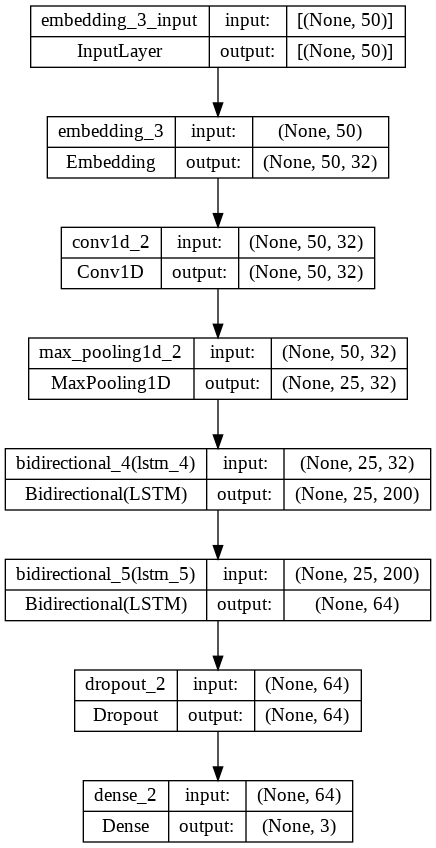

In [ ]:
tf.keras.utils.plot_model(model, show_shapes = True)

In [ ]:
# we train the model for 100 epochs
# verbose level 2 displays more info while trianing
print(model.summary())
# Compile model
model.compile(loss='BinaryCrossentropy', optimizer=sgd,
               metrics=['accuracy', Precision(), Recall()])


# Train model

history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64,verbose=1)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 32)            160000    
                                                                 
 conv1d_2 (Conv1D)           (None, 50, 32)            3104      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 25, 32)           0         
 1D)                                                             
                                                                 
 bidirectional_4 (Bidirectio  (None, 25, 200)          106400    
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               59648     
 nal)                                                            
                                                      

InvalidArgumentError: ignored

In [ ]:
#Evaluate model on the test set
accuracy = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy: ' , accuracy)

In [ ]:
from keras.callbacks import History
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''

    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')

plot_training_hist(history)

# Visualizing the Model